In [15]:
import json

resultsCNN = {}
resultsML = {}
resultsDL = {}


with open('resultsCNNAllcopy.json') as json_file:
    resultsCNN = json.load(json_file)



print(json.dumps(resultsCNN, indent=1))


{
 "Experiment": {
  "Raw": {
   "Fruits": {
    "Blueberries": {
     "Model": {
      "CNN": {
       "Epochs": {
        "100": {
         "r2": -0.004041072212986885,
         "loss": 0.425820529460907,
         "mse": 0.425820529460907,
         "mae": 0.4974079132080078,
         "rmse": 0.6525492668151855
        },
        "300": {
         "r2": -0.28635505761112245,
         "loss": 0.3195154368877411,
         "mse": 0.3195154368877411,
         "mae": 0.44928333163261414,
         "rmse": 0.5652569532394409
        }
       }
      },
      "DenseNet": {
       "Epochs": {
        "100": {
         "r2": -0.44493061337426054,
         "loss": 1.0411388874053955,
         "mse": 1.0411388874053955,
         "mae": 0.8645024299621582,
         "rmse": 1.020362138748169
        },
        "300": {
         "r2": -0.9744979839520378,
         "loss": 0.9882475137710571,
         "mse": 0.9882475137710571,
         "mae": 0.7977596521377563,
         "rmse": 0.9941064119338989
 

{'Experiment': {'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.13520050

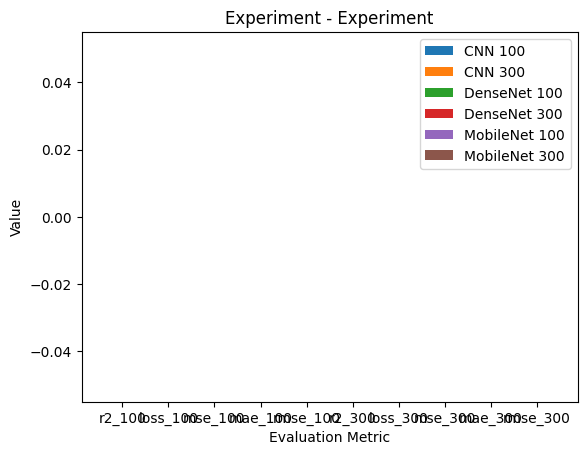

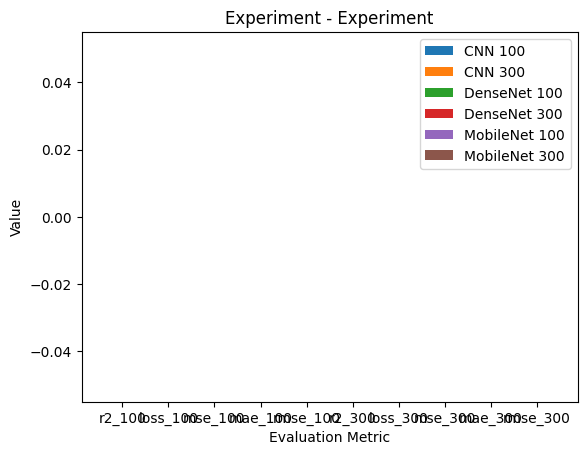

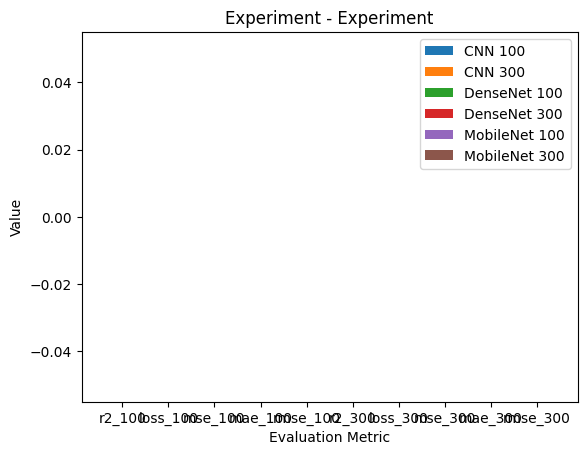

In [52]:
import json
import matplotlib.pyplot as plt
import numpy as np

data = resultsCNN


print(data)
# Define the evaluation metrics and models of interest
metrics = ['r2', 'loss', 'mse', 'mae', 'rmse']
models = ['CNN', 'DenseNet', 'MobileNet']

for d in data:
    #print(d)
    for ex in data[d]:
        #print(ex)
        for ef in data[d][ex]:
            #print(ef)
            for fruit in data[d][ex][ef]:
                #print(fruit)
                for it in data[d][ex][ef][fruit]["Model"]:
                    print(it)

# Loop through the data for each fruit and experiment
for fruit in data:
    for experiment in data[fruit]:
        # Get the evaluation metrics for each model type and epoch
        for model in models:
            for epoch in [100, 300]:
                metrics_vals = []
                for metric in metrics:
                    key = f'{metric}_{model}_{epoch}'
                    if key in data[fruit][experiment]:
                        metrics_vals.append(data[fruit][experiment][key])
                    else:
                        metrics_vals.append(0)  # Replace None with 0
                
                # Use the metrics_vals list to create your bar chart
                # for the current fruit, experiment, model, and epoch
                x_values = [f'{metric}_{epoch}' for metric in metrics]
                y_values = metrics_vals
                plt.bar(x_values, y_values, label=f'{model} {epoch}')
                
        plt.xlabel('Evaluation Metric')
        plt.ylabel('Value')
        plt.title(f'{fruit} - {fruit}')
        plt.legend()
        plt.show()








{'Experiment': {'Raw': {'Fruits': {'Blueberries': {'Model': {'CNN': {'Epochs': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}}, 'DenseNet': {'Epochs': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}}, 'MobileNet': {'Epochs': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.13520050

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

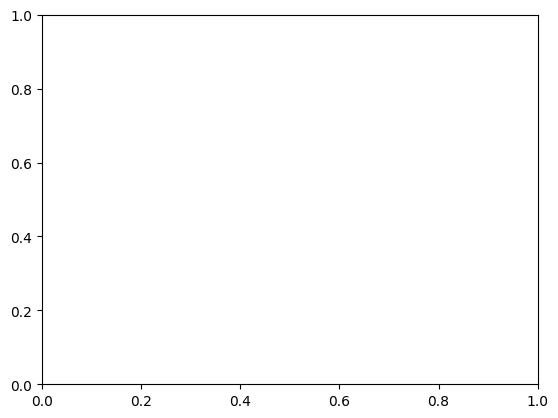

In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np

data = resultsCNN


print(data)
# Define the evaluation metrics and models of interest
metrics = ['r2', 'loss', 'mse', 'mae', 'rmse']
models = ['CNN', 'DenseNet', 'MobileNet']

# Loop through the data for each fruit and experiment
for fruit in data:
    for experiment in data[fruit]:
        # Get the evaluation metrics for each model type and epoch
        for model in models:
            for epoch in [100, 300]:
                metrics_vals = []
                for metric in metrics:
                    key = f'{metric}_{model}_{epoch}'
                    print(data[fruit][experiment])
                    print(key)
                    if key in data[fruit][experiment]:
                        metrics_vals.append(data[fruit][experiment][key])
                    else:
                        metrics_vals.append(None)
                
                # Use the metrics_vals list to create your bar chart
                # for the current fruit, experiment, model, and epoch
                x = np.arange(len(metrics))
                fig, ax = plt.subplots()
                rects = ax.bar(x, metrics_vals, align='center')
                ax.set_xticks(x)
                ax.set_xticklabels(metrics)
                ax.set_ylabel('Value')
                ax.set_title(f'{model} Epoch {epoch} {metric} for {fruit} ({experiment})')
                plt.show()

In [6]:
print(resultsCNN)

{'Raw': {'Images': {'CIBR': {'CNN': {'100': {'r2': -0.004041072212986885, 'loss': 0.425820529460907, 'mse': 0.425820529460907, 'mae': 0.4974079132080078, 'rmse': 0.6525492668151855}, '300': {'r2': -0.28635505761112245, 'loss': 0.3195154368877411, 'mse': 0.3195154368877411, 'mae': 0.44928333163261414, 'rmse': 0.5652569532394409}}, 'DenseNet': {'100': {'r2': -0.44493061337426054, 'loss': 1.0411388874053955, 'mse': 1.0411388874053955, 'mae': 0.8645024299621582, 'rmse': 1.020362138748169}, '300': {'r2': -0.9744979839520378, 'loss': 0.9882475137710571, 'mse': 0.9882475137710571, 'mae': 0.7977596521377563, 'rmse': 0.9941064119338989}}, 'MobileNet': {'100': {'r2': -0.5500927296410199, 'loss': 1.2789806127548218, 'mse': 1.2789806127548218, 'mae': 1.0103901624679565, 'rmse': 1.1309202909469604}, '300': {'r2': -2.0988388365925834, 'loss': 1.2886801958084106, 'mse': 1.2886801958084106, 'mae': 0.8523396253585815, 'rmse': 1.1352005004882812}}}, 'CIRR': {'CNN': {'100': {'r2': -0.007139206571461276, 